<a href="https://colab.research.google.com/github/AlImran1027/CSE299_Project/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [25]:
# Load the dataset
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")  # Change this to your actual file name

# Display the first few rows
df.head()


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [26]:
print(df.isnull().sum())


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [27]:
df = df.dropna()  # This removes rows with missing values
# or
# df.fillna(df.mean(), inplace=True)  # Fills missing values with column mean


In [28]:
df = df.drop(columns=['patientid'])


In [29]:
# df['gender'] = df['gender'].map({'male': 1, 'female': 0})
# df['chestpain'] = df['chestpain'].astype('category').cat.codes
# df['slope'] = df['slope'].astype('category').cat.codes


In [30]:
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable (0 or 1)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# Create and train the decision tree classifier
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=10)

In [34]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


In [35]:
# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9450
Precision: 0.9658
Recall: 0.9417
F1 Score: 0.9536
AUC-ROC Score: 0.9458

Confusion Matrix:
[[ 76   4]
 [  7 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.97      0.94      0.95       120

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



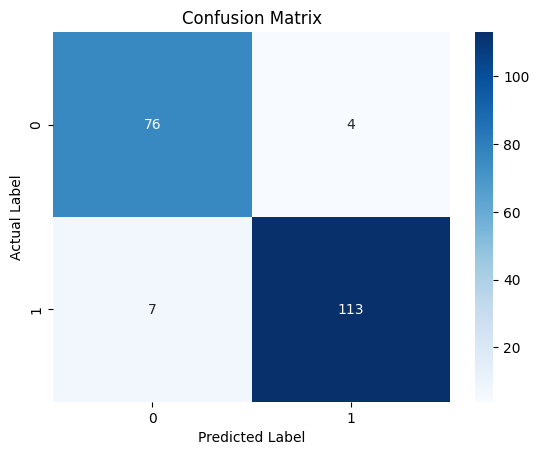

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


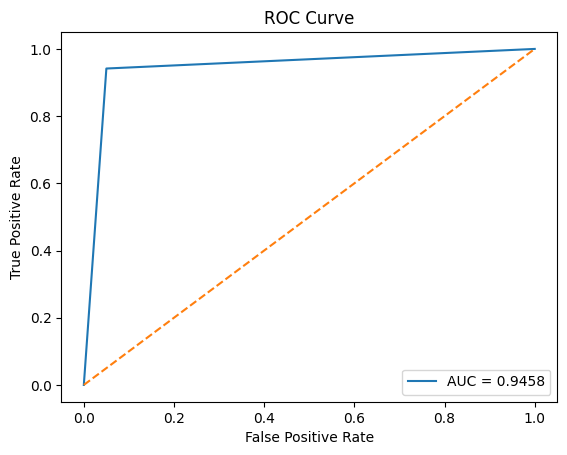

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


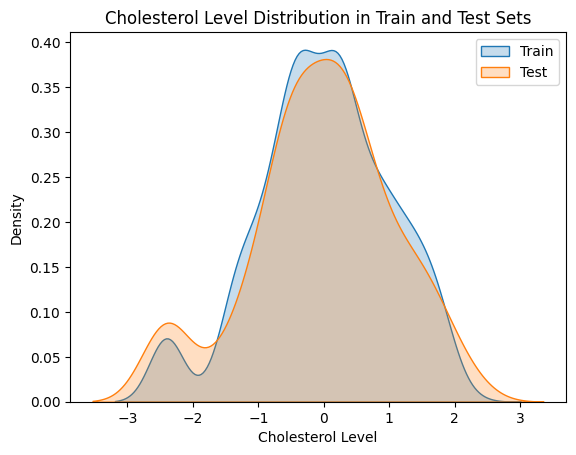

In [38]:
# Convert X_train and X_test back to DataFrame to extract 'chol'
# Get the columns from the original dataframe before converting to numpy array
X_train_df = pd.DataFrame(X_train, columns=df.columns[:-1]) # Exclude target column
X_test_df = pd.DataFrame(X_test, columns=df.columns[:-1]) # Exclude target column


# KDE plot for cholesterol levels
sns.kdeplot(X_train_df['serumcholestrol'], label="Train", fill=True)
sns.kdeplot(X_test_df['serumcholestrol'], label="Test", fill=True)
plt.legend()
plt.xlabel("Cholesterol Level")
plt.ylabel("Density")
plt.title("Cholesterol Level Distribution in Train and Test Sets")
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-Fold CV
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Cross-Validation Accuracy: 0.9637 ± 0.0165


In [40]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


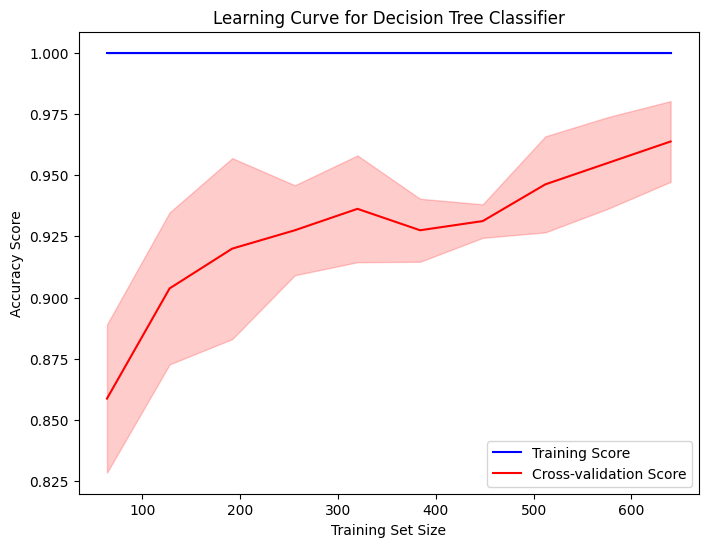

In [41]:
plt.figure(figsize=(8,6))

# Plot training curve
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

# Plot validation curve
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Decision Tree Classifier")
plt.legend()
plt.show()


In [42]:
# Analyze the learning curve
train_mean = np.mean(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)  # This line was causing the error
val_mean = np.mean(test_scores, axis=1)  # Use 'test_scores' instead which is already calculated

print("Training Scores:", train_mean)
print("Validation Scores:", val_mean)

# Check for underfitting/overfitting
if train_mean[-1] < 0.8 and val_mean[-1] < 0.8:
    print("Model is underfitting (high bias).")
elif train_mean[-1] > 0.9 and val_mean[-1] < 0.8:
    print("Model is overfitting (high variance).")
else:
    print("Model is performing well (good fit).")

Training Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation Scores: [0.85875 0.90375 0.92    0.9275  0.93625 0.9275  0.93125 0.94625 0.955
 0.96375]
Model is performing well (good fit).
